## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [4]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Convert Catrgorical values to numerical

In [5]:
df["Sex"] = pd.factorize(df['Sex'])[0].astype(np.uint8)
df["BP"] = pd.factorize(df['BP'])[0].astype(np.uint8)
df["Cholesterol"] = pd.factorize(df['Cholesterol'])[0].astype(np.uint8)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [6]:
df['Cholesterol'].unique()

array([0, 1], dtype=uint8)

In [7]:
X = df.drop(columns = ['Drug'])
y = df[["Drug"]]
X[0:5], y[0:5]

(   Age  Sex  BP  Cholesterol  Na_to_K
 0   23    0   0            0   25.355
 1   47    1   1            0   13.093
 2   47    1   1            0   10.114
 3   28    0   2            0    7.798
 4   61    0   1            0   18.043,
     Drug
 0  DrugY
 1  drugC
 2  drugC
 3  drugX
 4  DrugY)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 5), (40, 5), (160, 1), (40, 1))

## K-nearest Neighbour Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

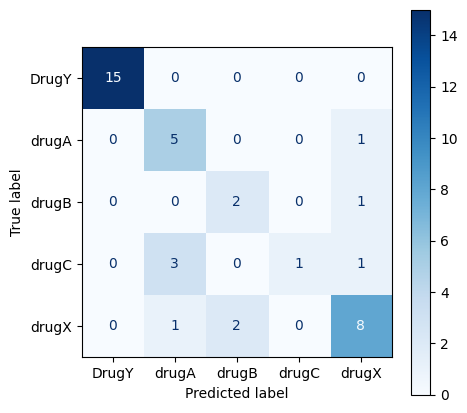

In [28]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(knn_model, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()

## Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB()

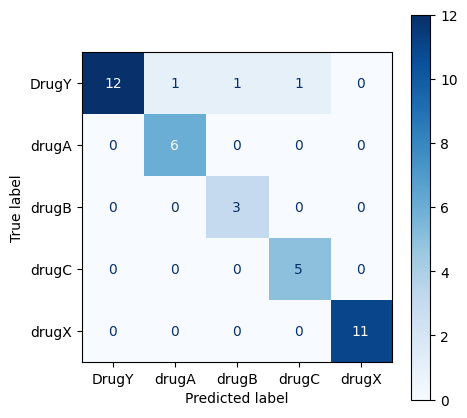

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gnb_model, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()

## Extreme Gradient Boosting

In [50]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

[19:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

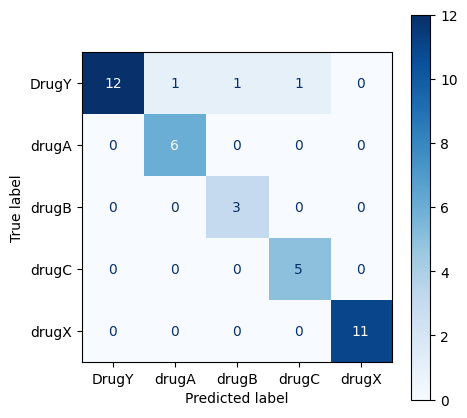

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(gnb_model, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()

## Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_model = xgb_model(max_features='auto',random_state=101)
decision_model.fit(X_train,y_train)

DecisionTreeClassifier(max_features='auto', random_state=101)

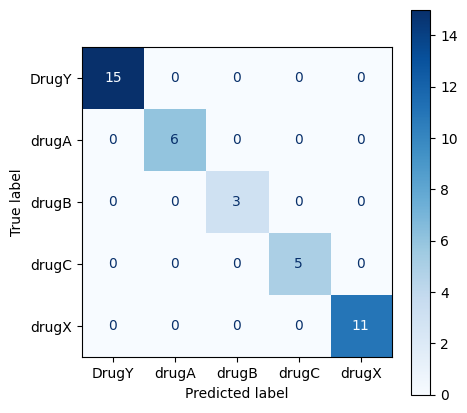

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(decision_model, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()

## Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(n_estimators=10 , max_features='auto',random_state=101)
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

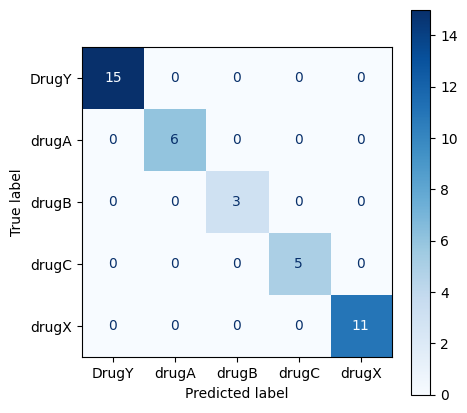

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(random_model, X_test, y_test, normalize=None, cmap=plt.cm.Blues, ax=ax)
plt.show()